<a href="https://colab.research.google.com/github/jesvin1/Basics/blob/master/PCR_MaxPain_high_OI_change_in_OI_nifty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting google drive to read the downloaded nse website option chain

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive' , force_remount=True)

Mounted at /content/drive


In [0]:
!cd "/content/drive/My Drive/Colab Notebooks/"

In [0]:
from bs4 import BeautifulSoup
import codecs
import pandas as pd
file="/content/drive/My Drive/Colab Notebooks/NSE - National Stock Exchange of India Ltd.html"

In [0]:
page = open(file,encoding='latin-1')
soup = BeautifulSoup(page, "html.parser")

In [0]:
#soup = BeautifulSoup(HtmlFile.read(), 'html.parser')
#print (soup.prettify())

table_it = soup.find_all("div", {"class": "opttbldata"})
table_cls_1 = soup.find_all(id='octable')

#print (table_it)
#print (table_cls_1)

In [9]:
table_cls_2 = soup.find(id="octable")
#print(table_cls_2)
req_row = table_cls_2.find_all('tr')
col=3
strike_price_list = []
calloi_list=[]
putoi_list=[]
#print(req_row)
for row_number, tr_nos in enumerate(req_row):
  # This ensures that we use only the rows with values
  if row_number <= 1 or row_number == len(req_row) - 1:
    continue

  td_columns = tr_nos.find_all('td')
  strike_price = int(float(BeautifulSoup(str(td_columns[11]), 'html.parser').get_text()))
  calloi = int(float(BeautifulSoup((str(td_columns[1]).replace('-','0').replace(',', '')), 'html.parser').get_text()))
  putoi = int(float(BeautifulSoup((str(td_columns[21]).replace('-','0').replace(',', '')), 'html.parser').get_text()))
  strike_price_list.append(strike_price)
  calloi_list.append(calloi)
  putoi_list.append(putoi)
  #print(strike_price)
  #print(int(float(BeautifulSoup(str(td_columns[11]), 'html.parser').get_text())))

df = pd.DataFrame(list(zip(strike_price_list,calloi_list,putoi_list)),columns=['strike','calloi','putoi'])
df.head()
  

,strike,calloi,putoi
0,6750,225,452475
1,6800,0,348075
2,6850,0,75
3,6900,0,89925
4,6950,375,357675


In [36]:
#strike=[7000,7100,7200,7300,7400,7500,7600,7700,7800,7900,8000,8100,8200,8300,8400,8500,8600]
#calloi=[1404300,335700,482100,422475,963900,999975,785550,1823400,3448575,5367450,6510975,5900325,5113350,3844500,2135625,2252250,1083750]
#putoi=[4087050,1029150,2977875,1975650,2336700,4548450,3690900,5783025,4864125,2559375,1447125,310500,248775,355725,255525,488475,58500]
#frame={'strike':strike,'calloi':calloi,'putoi':putoi}
#dft=pd.DataFrame(frame)
dft = df

dft['helpcall'] = dft['strike'] - dft.loc[0,'strike']

dft['ccall'] = 0
dft['cput'] = 0

j = 0
a = 0
for i in range(0,len(dft)):
  a = 0
  b = 0
  for j in range(0,i):
    a = a + dft['calloi'].iloc[j] * dft['helpcall'].iloc[i-j]
  dft['ccall'].iloc[i] = a
  
for i in range(len(dft),0,-1):
  b = 0

  for j in range(0,i):
    if i == len(dft):
      b = b + dft['putoi'].iloc[i-j-1] * dft['helpcall'].iloc[-(j+1)]
    else:
      b = b + dft['putoi'].iloc[j-i] * dft['helpcall'].iloc[j]
    dft['cput'].iloc[-i] = b
dft['Total'] = dft['ccall']+dft['cput']
print(df[df['Total']==dft['Total'].min()])

    strike  calloi  putoi  helpcall        ccall         cput        Total
71   10300  217425  70875      3550  13165537500  15536212500  28701750000


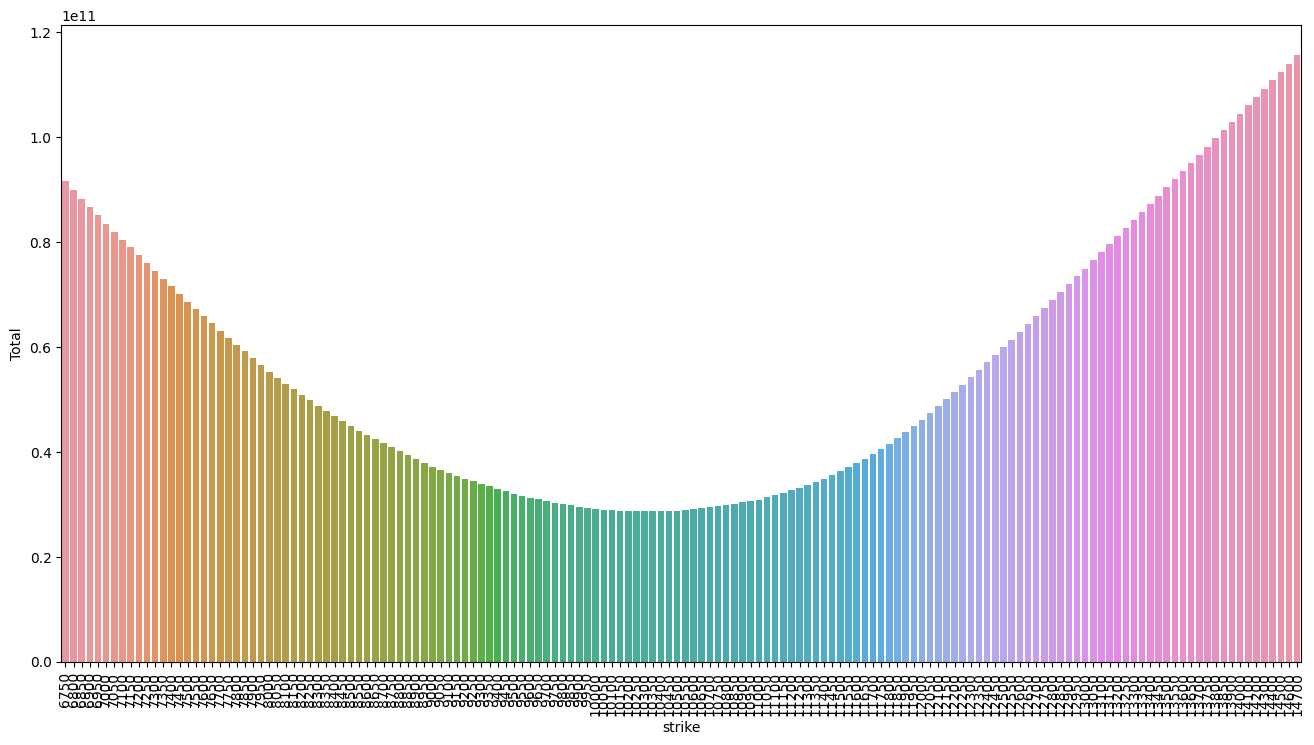

In [28]:
# Import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plot the exponential function
a4_dims = (16, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.barplot(ax=ax, x = dft['strike'], y = dft['Total'])
#g.set_xticklabels(rotation=90)
plt.xticks(rotation=90)
plt.show()

In [0]:
df.head()

,strik,calloi,putoi,helpcall,helpput
0,8100,2700,281925,0,6600
1,8150,0,0,50,6550
2,8200,375,1875,100,6500
3,8250,0,0,150,6450
4,8300,84450,594000,200,6400


In [0]:
df.tail()

,strik,calloi,putoi,helpcall,helpput
120,14300,0,0,6200,400
121,14400,1800,0,6300,300
122,14500,46650,26100,6400,200
123,14600,0,0,6500,100
124,14700,11700,0,6600,0


In [0]:
df.to_excel('output.xlsx')

In [0]:
from google.colab import files
files.download('output.xlsx')